In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('July-Sep 2020.csv')

In [3]:
df['sentiment']

0         neu
1         neu
2         pos
3         neu
4         neu
         ... 
320311    neg
320312    neg
320313    neu
320314    neg
320315    neg
Name: sentiment, Length: 320316, dtype: object

In [4]:
tweet_li=df['clean_tweet'].tolist()

In [5]:
tweet_li=[str(i) for i in tweet_li]

## 1. word cloud

In [6]:
df['clean_tweet']=df['clean_tweet'].apply(str)

In [7]:
co_df=pd.concat([pd.Series(row['sentiment'],row['clean_tweet'].split(' ')) for _, row in df.iterrows()]).reset_index()

In [8]:
co_df.columns=['word','sen']

In [9]:
neu_words=co_df.loc[co_df['sen']=='neu']

In [10]:
pos_words=co_df.loc[co_df['sen']=='pos']

In [11]:
neg_words=co_df.loc[co_df['sen']=='neg']

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
neu_words_li=[i for i in list(neu_words['word']) if i not in ['covid19']]

In [19]:
str_neu=' '.join(neu_words_li)

In [20]:
word_cloud_neu=WordCloud(width=1000,height=500,background_color='grey',scale=1.5).generate(str_neu)

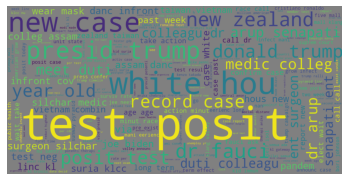

In [21]:
plt.imshow(word_cloud_neu)
plt.axis('off')
plt.show()

In [22]:
word_cloud_neu.to_file('neu_cloud.jpg')

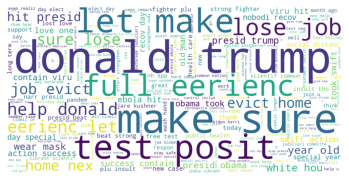

In [23]:
pos_words_li=[i for i in list(pos_words['word']) if i not in ['covid19']]
str_pos=' '.join(pos_words_li)
word_cloud_pos=WordCloud(width=1000,height=500,background_color='white',scale=1.5).generate(str_pos)
plt.imshow(word_cloud_pos)
plt.axis('off')
plt.show()

In [24]:
word_cloud_pos.to_file('pos_cloud.jpg')

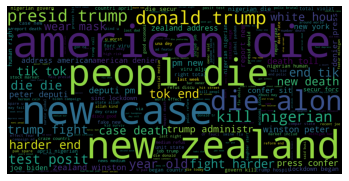

In [25]:
neg_words_li=[i for i in list(neg_words['word']) if i not in ['covid19']]
str_neg=' '.join(neg_words_li)
word_cloud_neg=WordCloud(width=1000,height=500,scale=1.5).generate(str_neg)
plt.imshow(word_cloud_neg)
plt.axis('off')
plt.show()

In [26]:
word_cloud_neg.to_file('neg_cloud.jpg')

In [138]:
'''
neg_words_rank=pd.DataFrame(neg_words['word'].groupby(neg_words['word']).count())
neg_words_rank.columns=['count']
neg_words_rank=neg_words_rank.sort_values(by='count',ascending=False)
'''

'''
pos_words_rank=pd.DataFrame(pos_words['word'].groupby(pos_words['word']).count())
pos_words_rank.columns=['count']
pos_words_rank=pos_words_rank.sort_values(by='count',ascending=False)
'''

'''
neu_words_rank=pd.DataFrame(neu_words['word'].groupby(neu_words['word']).count())
neu_words_rank.columns=['count']
neu_words_rank=neu_words_rank.sort_values(by='count',ascending=False)
'''

"\nneu_words_rank=pd.DataFrame(neu_words['word'].groupby(neu_words['word']).count())\nneu_words_rank.columns=['count']\nneu_words_rank=neu_words_rank.sort_values(by='count',ascending=False)\n"

## 2. sentiment distribution

In [27]:
from snownlp import SnowNLP

In [28]:
r=[]
for i in range(len(tweet_li)):
    s_ = SnowNLP(tweet_li[i])
    score=s_.sentiments
    r.append(score)

In [29]:
import matplotlib.pyplot as plt

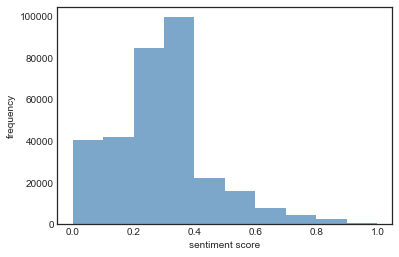

<Figure size 432x288 with 0 Axes>

In [30]:
plt.style.use('seaborn-white')
plt.ylabel('frequency')
plt.xlabel('sentiment score')
plt.hist(r,bins=10,alpha=0.7,histtype='stepfilled',color='steelblue',edgecolor='none')
plt.show()
plt.savefig('sentiment distribution.jpg')

## 3. detailed sentiment 

In [163]:
from senticnet.senticnet import SenticNet

In [173]:
line_tag

[['#joy', '#eagerness'],
 ['#disgust', '#fear'],
 ['#joy', '#anger'],
 ['#sadness', '#disgust'],
 ['#calmness', '#eagerness'],
 ['#joy', '#eagerness']]

In [175]:
line_word=[]
line_tag=[]
for n in range(len(tweet_li)):
    for w in tweet_li[n].split():
        try:
            word_tag=sn.moodtags(w)
            line_word.append(w)
            line_tag.append(word_tag)
        except:
            pass

In [183]:
dic={'line_word':line_word,
   'line_tag':line_tag}
df_tag=pd.DataFrame(dic)

In [186]:
df_tag=df_tag.applymap(str)

In [188]:
df_tag['line_tag']=df_tag['line_tag'].map(lambda x:x[1:-1])

In [189]:
df_tag

,line_word,line_tag
0,old,"'#sadness', '#anger'"
1,land,"'#calmness', '#eagerness'"
2,break,"'#joy', '#eagerness'"
3,depart,"'#disgust', '#fear'"
4,health,"'#joy', '#anger'"
...,...,...
869739,cover,"'#joy', '#eagerness'"
869740,via,"'#calmness', '#eagerness'"
869741,die,"'#sadness', '#disgust'"
869742,full,"'#pleasantness', '#eagerness'"


In [190]:
tag_df=pd.concat([pd.Series(row['line_word'],row['line_tag'].split(',')) for _, row in df_tag.iterrows()]).reset_index()

In [195]:
tag_df.columns=['sentiment','word']

In [198]:
tag_df

,sentiment,word
0,'#sadness',old
1,'#anger',old
2,'#calmness',land
3,'#eagerness',land
4,'#joy',break
...,...,...
1739483,'#disgust',die
1739484,'#pleasantness',full
1739485,'#eagerness',full
1739486,'#eagerness',cook


In [201]:
group_count=tag_df['word'].groupby([tag_df['sentiment'],tag_df['word']]).count()

In [203]:
senti_df=pd.DataFrame(group_count)

In [205]:
senti_df.to_csv('senti_df.csv')

In [206]:
senti_df=pd.read_csv('senti_df.csv')

In [221]:
senti_df.columns

Index(['sentiment', 'word', 'word.1'], dtype='object')

In [236]:
color=['deepskyblue','skyblue','lightskyblue','steelblue','lightseagreen','mediumturquoise','lightcyan','paleturquoise',
      'bisque','orange','wheat','gold','pink','hotpink','lightpink','palevioletred']

In [215]:
keys=list(senti_df['sentiment'].unique())

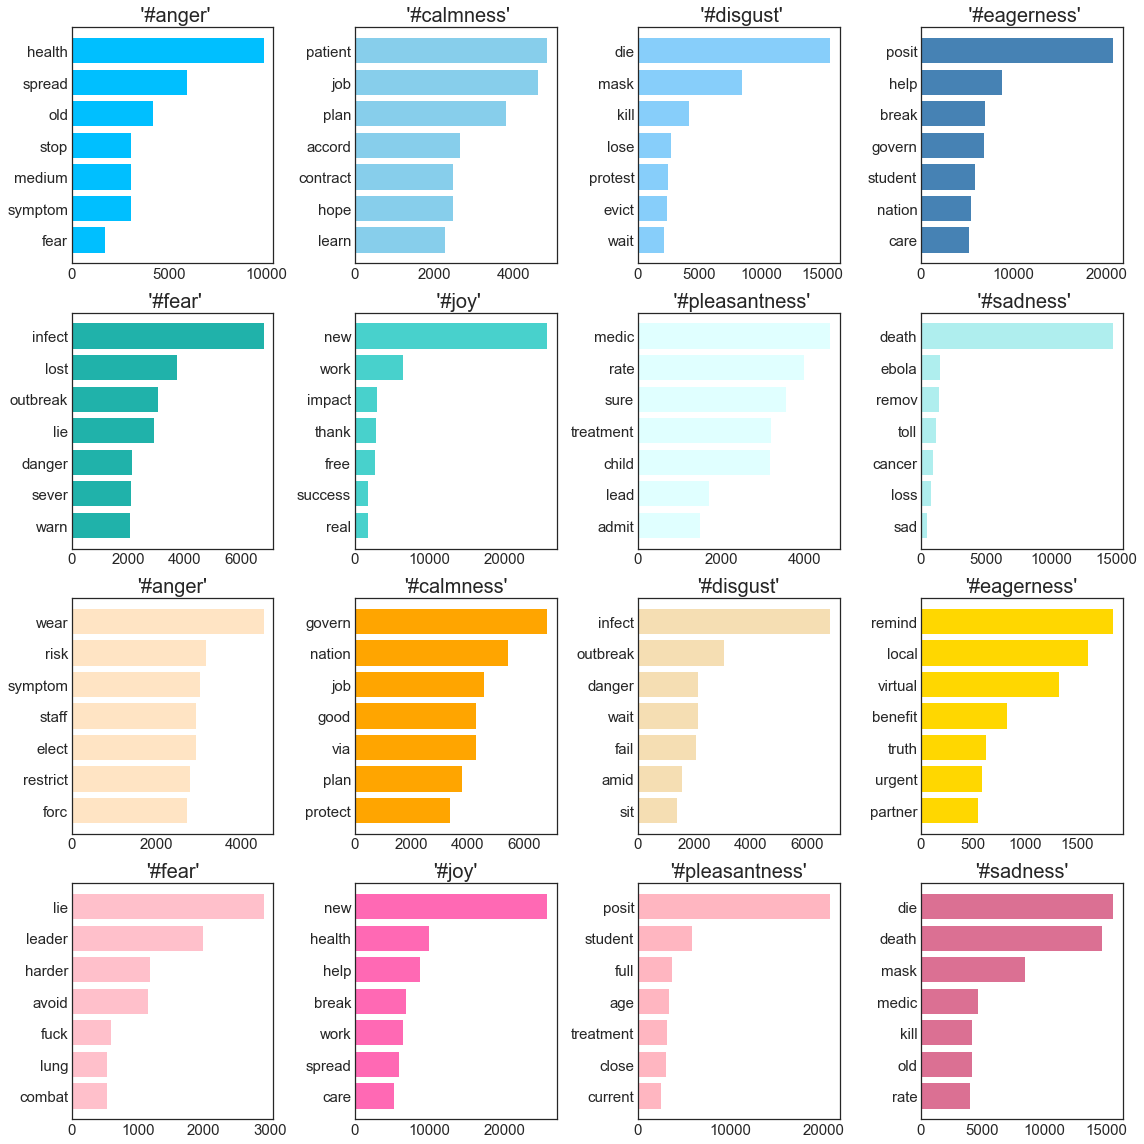

In [246]:
fig=plt.figure(figsize=(16,16))

for x in range(len(color)):
    ax=fig.add_subplot(4,4,x+1)
    df_sort=senti_df[senti_df['sentiment']==keys[x]].sort_values(by='word.1')
    plt.barh(range(len(df_sort['word.1'][-7:])),df_sort['word.1'][-7:],tick_label=df_sort['word'][-7:],facecolor=color[x])
    plt.title(keys[x],fontsize=20)
    plt.tick_params(labelsize=15)
    plt.tight_layout()
plt.savefig('组图.jpg')

 https://blog.51cto.com/u_15069487/2581205

## 4. social network

In [139]:
co=df[['original_author', 'user_mentions']]

In [140]:
co1=co.dropna()

In [141]:
co1=co1.applymap(str)

In [142]:
co_df=pd.concat([pd.Series(row['original_author'],row['user_mentions'].split(',')) for _, row in co1.iterrows()]).reset_index()

In [143]:
co_df.columns=['user_mentions','original_author']

In [144]:
co_df1=co_df[['original_author', 'user_mentions']]

In [145]:
co_df1['original_author'].value_counts()

CaronaUpdates      249
CoronaUpdateBot    181
news24x75          165
Patrick63104016    162
viralvideovlogs    138
                  ... 
CA_Mukeshh           1
2010somerset         1
ClaudetteG27         1
mrharry001           1
KaylaAnnLyda         1
Name: original_author, Length: 156345, dtype: int64

In [146]:
co_df1['original_author']=co_df1['original_author'].apply(lambda x:x.strip())

In [147]:
co_df1[['original_author','user_mentions']].to_csv('social_network.csv')